In [1]:
# Load packages
import requests 
import pandas as pd 
import time
import re

from bs4 import BeautifulSoup
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
url = 'https://ubereats.pissedconsumer.com/review.html#reviews'  

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!--[if IE]><meta http-equiv='X-UA-Compatible' content='IE=edge,chrome=1'><![endif]-->
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, viewport-fit=auto" name="viewport"/>
<meta content="Ubereats has 49973 reviews (average rating 1.6). Consumers say: Keep getting wrong orders with no resolution, Uber eats refuses to give me a partial credit for damaged dessert" name="description"/>
<meta content="#4b64a6" name="theme-color"/>
<link as="font" crossorigin="" href="/themes/pc2/fonts/Linearicons-Custom.woff?2843207528432075" rel="preload" type="font/woff"/>
<link href="https://www.pissedconsumer.com/images/favicons/apple-icons-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="https://www.pissedconsumer.com/images/favicons/apple-icons-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="https://www.pissedconsumer.com/images/favico
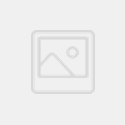

In [3]:
resp = requests.get(url)
content = BeautifulSoup(resp.content, 'lxml')
print(content)

In [26]:
def scrape_reviews(url):

  service = Service(executable_path="C:\\Program Files (x86)\\chromedriver.exe")
  driver = webdriver.Chrome(service=service)
  reviews = []

  driver.get(url)
    
  cards = driver.find_elements(By.CSS_SELECTOR, '.review-card')

  for card in cards:
  
    try:
      name = card.find_element(By.CSS_SELECTOR, '.has-text-weight-bold').text

      # Find date element using BeautifulSoup for more flexibility
      date_element = card.find_element(By.XPATH, ".//div[contains(text(), 'at')]")
      date_text = date_element.text

      # Extract date using BeautifulSoup and regex
      soup = BeautifulSoup(date_text, 'html.parser')
      date_match = re.search(r'(\d+ \w+ \d+ at \d+:\d+)', soup.get_text())
      date = date_match.group(1) if date_match else None
      
      rating = len(card.find_elements(By.CSS_SELECTOR, '.is-star-1'))
      
      title = card.find_element(By.CSS_SELECTOR, '.has-text-weight-bold.margin-top-24').text
      
      review = card.find_element(By.CSS_SELECTOR, '.margin-bottom-15').text
      
      review_data = {
        'review': review,
        'date': date, 
        'stars': rating,
        'name': name,
        'source': 'hellopeter',
        'title': title
      }

      reviews.append(review_data)
      
    except Exception as e:
      print(e)
      continue


  driver.quit()

  return pd.DataFrame(reviews)

In [27]:
df_reviews = scrape_reviews(content)
df_reviews

'NoneType' object is not callable


""


In [6]:
df_reviews.to_csv("ubereats_pissed_consumer.csv", index= False)